## Feature Engineering

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
x = df.copy()
y = x.pop('CompressiveStrength')

In [5]:
#training a baseline model
baseline = RandomForestRegressor(criterion='mae', random_state =0)
baseline_score = cross_val_score(baseline, x, y, cv=5, scoring='neg_mean_absolute_error')

baseline_score = -1*baseline_score.mean()

print(f'MAE Baseline Score: {baseline_score:.4}')

MAE Baseline Score: 8.232


In [6]:
x = df.copy()
y = x.pop('CompressiveStrength')

In [7]:
#creating sythetic features
x['FCratio']=x['FineAggregate']/x['CoarseAggregate']
x['AggCemRatio'] = (x['FineAggregate']+ x['CoarseAggregate']) / x['Cement']
x['WtrCemRatio'] = x['Water']/x['Cement']

#training a baseline model
baseline = RandomForestRegressor(criterion='mae', random_state =0)
baseline_score = cross_val_score(baseline, x, y, cv=5, scoring='neg_mean_absolute_error')

baseline_score = -1*baseline_score.mean()

print(f'MAE Baseline Score: {baseline_score:.4}')

MAE Baseline Score: 7.948


### Mutual Information

##### it tell us the relationship between the all features with the target feature

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')

In [9]:
df = pd.read_csv('autos.csv')

In [10]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [11]:
x = df.copy()
y = x.pop('price')

In [12]:
#Label encoding from categorical featurtes
for colname in x.select_dtypes('object'):
    x[colname],_ = x[colname].factorize()
    
discrete_features = x.dtypes ==int

In [3]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

NameError: name 'x' is not defined

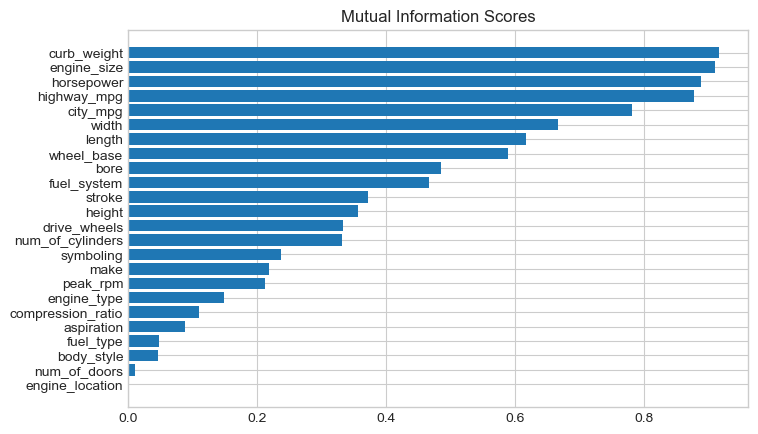

In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

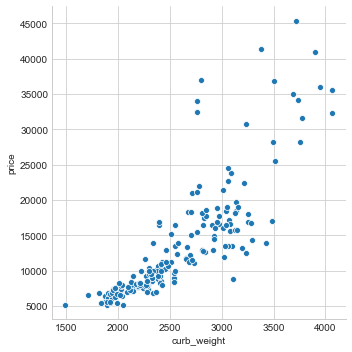

In [15]:
sns.relplot(x='curb_weight', y='price', data=df)

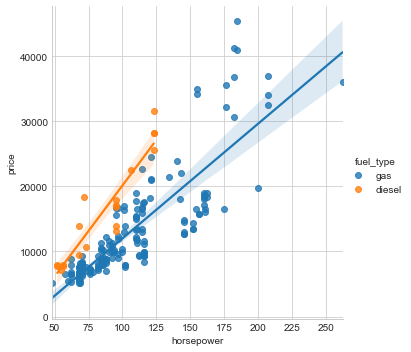

In [16]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=df)

### Creating features

In [20]:
cust = pd.read_csv('customer.csv')
auto = pd.read_csv('autos.csv')

In [22]:
cust.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [23]:
cust[['Type','Level']]=(
    cust['Policy'].str.split(" ",expand=True)
)
cust[['Policy','Type','Level']].head()

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1


In [24]:
auto.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [25]:
auto['make_and_style']=auto['make']+'_' + auto['body_style']
auto[['make_and_style','make','body_style']].head()

,make_and_style,make,body_style
0,alfa-romero_convertible,alfa-romero,convertible
1,alfa-romero_convertible,alfa-romero,convertible
2,alfa-romero_hatchback,alfa-romero,hatchback
3,audi_sedan,audi,sedan
4,audi_sedan,audi,sedan


### Group by Function

In [26]:
cust.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate,L3
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal,L3
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal,L3
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Corporate,L2
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Personal,L1


In [27]:
#group the according to the states
cust['AverageIncome']=(
    cust.groupby('State')
    ['Income']
    .transform('mean')
)
cust[['State','Income','AverageIncome']]

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
...,...,...,...
9129,California,71941,37558.946667
9130,California,21604,37558.946667
9131,California,0,37558.946667
9132,California,21941,37558.946667


In [28]:
#frequency ratio of all features
cust['StateFreq']=(
    cust.groupby('State')
    ['State']
    .transform('count')/cust.State.count()
)
cust[['State','StateFreq']].head()

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366


### Categorical Features

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [30]:
me =pd.read_csv('melb_data.csv')

In [31]:
me.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [32]:
y = me.Price
x = me.drop(['Price'], axis=1)

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,random_state=0)

cols_with_missing = [col for col in x_train.columns if x_train[col].isnull().any()]
x_train.drop(cols_with_missing, axis =1, inplace =True)
x_valid.drop(cols_with_missing, axis =1, inplace =True)

In [35]:

low_cardinality_cols = [cname for cname in x_train.columns if x_train[cname].nunique()<10 and x_train[cname].dtype=='object']
numerical_cols = [cname for cname in x_train.columns if x_train[cname].dtype in ['int64','float64']]
my_cols = low_cardinality_cols + numerical_cols
train_x = x_train[my_cols].copy()
valid_x = x_valid[my_cols].copy()

In [36]:
s = (train_x.dtypes =='object')
object_cols = list(s[s].index)

print('categorical variables are:', object_cols)

categorical variables are: ['Type', 'Method', 'Regionname']


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(train_x, valid_x, y_train, y_valid):
    model = RandomForestRegressor(n_estimators = 100, random_state =0)
    model.fit(train_x, y_train)
    preds = model.predict(valid_x)
    return mean_absolute_error(y_valid, preds)

#### Apply Drop

In [38]:


drop_train_x = train_x.select_dtypes(exclude=['object'])
drop_valid_x  = valid_x.select_dtypes(exclude=['object'])

print("MAE from approach 1(drop categorical features)")
print(score_dataset(drop_train_x, drop_valid_x, y_train, y_valid))

MAE from approach 1(drop categorical features)
175703.48185157913


#### Apply Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

label_train_x =  train_x.copy()
label_valid_x =valid_x.copy()


label_encoder = LabelEncoder()
for col in object_cols:
    label_train_x[col]= label_encoder.fit_transform(train_x[col])
    label_valid_x[col]= label_encoder.fit_transform(valid_x[col])
    
print("MAE from approach 2(Label Encoding categorical features)")
print(score_dataset(label_train_x, label_valid_x, y_train, y_valid))

MAE from approach 2(Label Encoding categorical features)
165936.40548390493


#### Apply one hot encoding

In [40]:


from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_x[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(valid_x[object_cols]))

OH_cols_train.index = train_x.index
OH_cols_valid.index = valid_x.index

num_train_x = train_x.drop(object_cols, axis=1)
num_valid_x = valid_x.drop(object_cols, axis=1)

OH_train_x = pd.concat([num_train_x, OH_cols_train], axis =1)
OH_valid_x = pd.concat([num_valid_x, OH_cols_valid], axis =1)

print("MAE from approach 3(one hot Encoding categorical features)")
print(score_dataset(OH_train_x, OH_valid_x, y_train, y_valid))

MAE from approach 3(one hot Encoding categorical features)
166089.4893009678
